In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train = pd.read_csv('train.csv')

In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


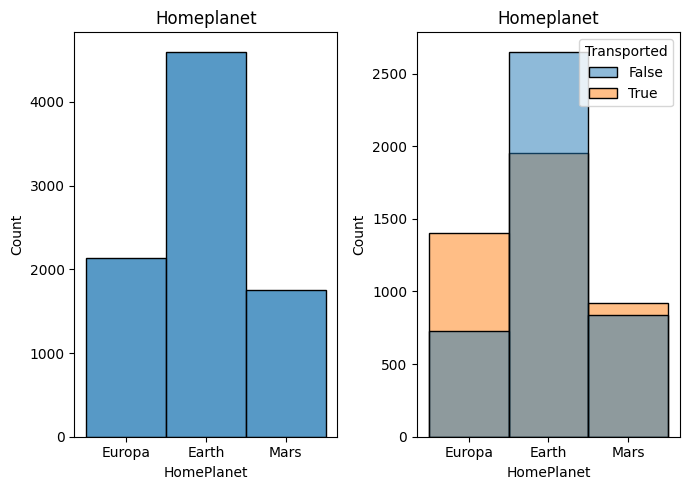

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(7, 5))

sns.histplot(x='HomePlanet', data=train, ax=axs[0])
axs[0].set_title('Homeplanet')

sns.histplot(x='HomePlanet', data=train, hue='Transported', ax=axs[1])
axs[1].set_title('Homeplanet')

plt.tight_layout()
plt.show()


<Axes: xlabel='Transported', ylabel='count'>

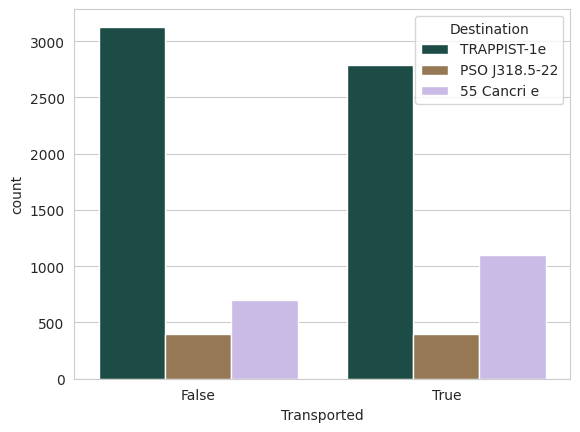

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='Destination', data=train,palette='cubehelix')

In [19]:
# Dropping the columns with too many missing values which cannot be reasonably imputed or
# Don't have any apparent analytical usefulness

drop_col_names = ['PassengerId', 'Cabin', 'VIP', 'FoodCourt', 'Spa', 'VRDeck', 'Name']

In [31]:
train_data = train.drop(drop_col_names, axis=1)

train_data.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,ShoppingMall,Transported
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,109.0,25.0,True
2,Europa,False,TRAPPIST-1e,58.0,43.0,0.0,False
3,Europa,False,TRAPPIST-1e,33.0,0.0,371.0,False
4,Earth,False,TRAPPIST-1e,16.0,303.0,151.0,True


In [37]:
train_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'ShoppingMall', 'Transported'],
      dtype='object')

In [48]:
print(f'Total no of rows = {len(train_data)}')

print(f'\nTotal no of rows after dropping nan = {len(train_data.dropna())}')

for column in train_data.columns:
  print(f'\nMissing {column} values = {len(train_data[train_data[column].isna()])}')


Total no of rows = 8693

Total no of rows after dropping nan = 7581

Missing HomePlanet values = 201

Missing CryoSleep values = 217

Missing Destination values = 182

Missing Age values = 179

Missing RoomService values = 181

Missing ShoppingMall values = 208

Missing Transported values = 0
